<a href="https://colab.research.google.com/github/Ankith-1/hackculture/blob/main/Review_Analysis_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("/review_2.csv", encoding='latin1')


In [15]:
df.head()

,ï»¿rsqaWe,wiI7pd
0,3 days ago,Wow! I have no words to express my pleasure an...
1,2 weeks ago,I was visited there on 26/08/2024 on that time...
2,a week ago,This palace has a strong history from ages. Pl...
3,a week ago,Visiting Mysore attractions on weekdays is enj...
4,a month ago,I recently visited the Mysore Palace during my...


In [16]:
df.shape

(363, 2)

In [17]:
df.shape

(363, 2)

In [18]:
df.columns = ['time', 'review']

In [19]:
df['review'].isna().any()

True

In [20]:
# # Convert empty strings to NaN to ensure consistency
df['review'] = df['review'].replace('', np.nan)

# Drop rows where 'review' column is NaN
df_cleaned = df.dropna(subset=['review'])

# Display the cleaned DataFrame
print(df_cleaned)

            time                                             review
0     3 days ago  Wow! I have no words to express my pleasure an...
1    2 weeks ago  I was visited there on 26/08/2024 on that time...
2     a week ago  This palace has a strong history from ages. Pl...
3     a week ago  Visiting Mysore attractions on weekdays is enj...
4    a month ago  I recently visited the Mysore Palace during my...
..           ...                                                ...
356  4 years ago  It's clean and well maintained and there's a l...
357  2 years ago                               A series of salaries
359   a year ago  This is Versailles in India, large garden, lar...
360  2 years ago                            Proud to b a Karntakian
361  5 years ago  Mysore Palace Karnataka Very grand and big pal...

[358 rows x 2 columns]


In [27]:
df_cleaned['review'][14]

'Wonderful palace to visit. Excellent teak wood carvings on doors and roof. Sprawling campus. Major part of the fort is closed for tourists I suppose as you come out of the palace in just half an hour as compared to earlier visit when it took more than two hours.'

In [29]:
from textblob import TextBlob

# Example text
text = "The palace is not just a feast for the eyes but also offers a glimpse into the rich history and culture of the Wadiyar dynasty. The guided tour provided fascinating insights into the royal family's history and the significance of various"

# Create a TextBlob object
blob = TextBlob(text)

# Get the sentiment polarity
polarity = blob.sentiment.polarity

# Determine sentiment
sentiment = "positive" if polarity > 0 else "negative" if polarity < 0 else "neutral"
print(f"Sentiment: {sentiment}, Polarity: {polarity}")

Sentiment: positive, Polarity: 0.29374999999999996


In [30]:
def analyze_sentiment(text):
    blob = TextBlob(text)

    # Get the sentiment polarity
    polarity = blob.sentiment.polarity
    sentiment = "positive" if polarity > 0 else "negative" if polarity < 0 else "neutral"
    return sentiment

In [31]:
df['sentiment'] = df['review'].apply(lambda x: analyze_sentiment(str(x)))

In [32]:
df.head()


,time,review,sentiment
0,3 days ago,Wow! I have no words to express my pleasure an...,positive
1,2 weeks ago,I was visited there on 26/08/2024 on that time...,positive
2,a week ago,This palace has a strong history from ages. Pl...,positive
3,a week ago,Visiting Mysore attractions on weekdays is enj...,positive
4,a month ago,I recently visited the Mysore Palace during my...,positive


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('time').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 149 (\x95) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 157 (\x9d) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('review').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'time'}, axis=1)
              .sort_values('time', ascending=True))
  xs = counted['time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('time')):
  _plot_series(series, series_name, i)
  fig.legend(title='time', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('count()')

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 149 (\x95) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 157 (\x9d) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'time'}, axis=1)
              .sort_values('time', ascending=True))
  xs = counted['time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('review')):
  _plot_series(series, series_name, i)
  fig.legend(title='review', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('count()')

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 149 (\x95) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 157 (\x9d) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 149 (\x95) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 157 (\x9d) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['review'].value_counts()
    for x_label, grp in _df_4.groupby('time')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('time')
_ = plt.ylabel('review')

In [33]:
df['sentiment'].isna().any()

False

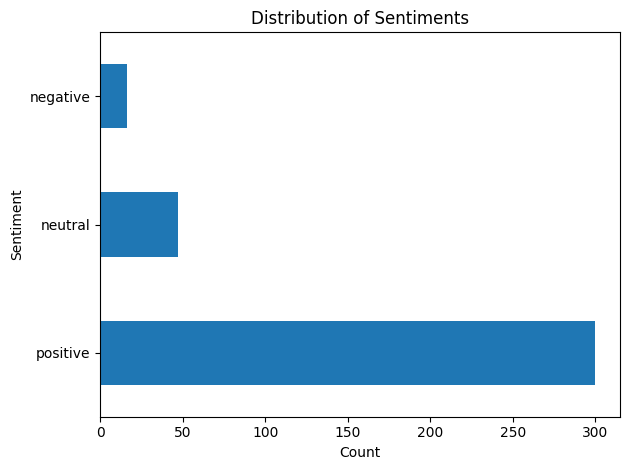

In [34]:
df['sentiment'].value_counts().plot.barh()

# Adding labels and title for clarity
plt.xlabel('Count')
plt.ylabel('Sentiment')
plt.title('Distribution of Sentiments')
plt.tight_layout()
# Show the plot
plt.show()

In [35]:
from datetime import datetime, timedelta
# Convert 'time' to approximate dates
current_date = datetime.now()
time_conversion = {
    "months ago": 30,  # Approximate each month as 30 days
    "year ago": 365,   # 365 days for a year
}

def convert_time_to_date(text):
    for key, value in time_conversion.items():
        if key in text:
            number = int(text.split()[0]) if text.split()[0].isdigit() else 12  # Assume 'a year ago' means 12 months
            return current_date - timedelta(days=number * value)
    return current_date

In [36]:
df['approx_date'] = df['time'].apply(convert_time_to_date)

TypeError: argument of type 'float' is not iterable

In [39]:
# Ensure all entries in 'time' column are strings, fill NaN with a default value like "unknown"
df['time'] = df['time'].fillna('unknown').astype(str)

# Function to convert the 'time' text to date
def convert_time_to_date(text):
    for key, value in time_conversion.items():
        if key in text:
            # Split the text to get the number if present
            number = int(text.split()[0]) if text.split()[0].isdigit() else 12  # Assume 'a year ago' means 12 months
            return current_date - timedelta(days=number * value)
    return None  # Return None if no matching time conversion found

# Apply the conversion function to the 'time' column
df['approx_date'] = df['time'].apply(convert_time_to_date)


In [40]:
df.head()


,time,review,sentiment,approx_date
0,3 days ago,Wow! I have no words to express my pleasure an...,positive,NaT
1,2 weeks ago,I was visited there on 26/08/2024 on that time...,positive,NaT
2,a week ago,This palace has a strong history from ages. Pl...,positive,NaT
3,a week ago,Visiting Mysore attractions on weekdays is enj...,positive,NaT
4,a month ago,I recently visited the Mysore Palace during my...,positive,NaT


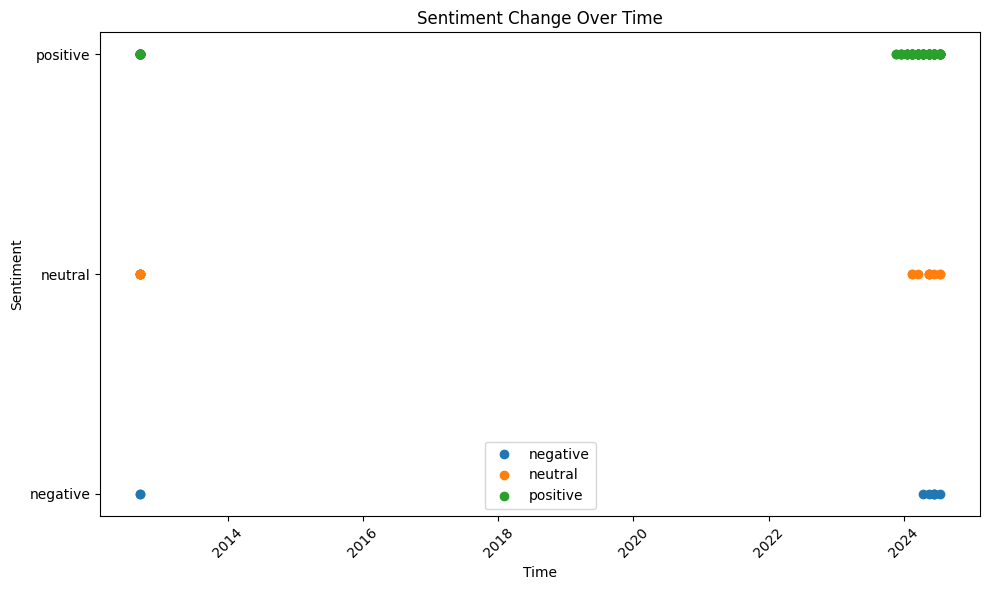

In [41]:
import matplotlib.pyplot as plt
# Sort DataFrame by 'approx_date'
df.sort_values(by='approx_date', inplace=True)

# Visualization
plt.figure(figsize=(10, 6))
for sentiment, group in df.groupby('sentiment'):
    plt.plot(group['approx_date'], [sentiment] * len(group), 'o', label=sentiment)

plt.xlabel('Time')
plt.ylabel('Sentiment')
plt.title('Sentiment Change Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
pip install transformers


In [44]:
import pandas as pd
from transformers import pipeline

# Load your dataset
# df = pd.read_csv('your_dataset.csv')  # Assuming you have already loaded the dataset

# Clean the comments: replace NaNs with empty strings and ensure all comments are strings
df['review'] = df['review'].fillna("").astype(str)

# Summarize function
def summarize_comments(comments):
    # Combine all comments into one block of text
    combined_text = " ".join(comments)

    # Load the Hugging Face summarization pipeline
    summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

    # Summarize the text
    summary = summarizer(combined_text, max_length=130, min_length=50, do_sample=False)

    return summary[0]['summary_text']

# Generate the summary
all_reviews = df['review']  # Using the cleaned reviews
summary = summarize_comments(all_reviews)

# Print the summary
print(summary)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


IndexError: index out of range in self

In [46]:
import pandas as pd
from transformers import pipeline

# Load your dataset
# df = pd.read_csv('your_dataset.csv')  # Assuming you have already loaded the dataset

# Clean the comments: replace NaNs with empty strings and ensure all comments are strings
df['review'] = df['review'].fillna("").astype(str)

# Sample a subset of comments to speed up the process
sampled_reviews = df['review'].sample(n=100)  # Adjust the sample size as needed

# Summarize function
def summarize_comments(comments, chunk_size=500):
    # Combine all comments into one block of text
    combined_text = " ".join(comments)

    # Wrap text into chunks
    chunks = [combined_text[i:i + chunk_size] for i in range(0, len(combined_text), chunk_size)]

    # Load the Hugging Face summarization pipeline
    summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

    # Summarize each chunk
    summaries = []
    for chunk in chunks:
        summary = summarizer(chunk, max_length=100, min_length=30, do_sample=False)
        summaries.append(summary[0]['summary_text'])

    # Combine summaries
    full_summary = " ".join(summaries)

    return full_summary

# Generate the summary
summary = summarize_comments(sampled_reviews)

# Print the summary
print(summary)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Your max_length is set to 100, but your input_length is only 48. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)


The charm, architecture and grandeur of the ancient palace is a sight to behold. Cost was high there is know option for smart payment only cash they accepting. It is amazing to have a royal palace in a remote city. Unfortunately I could make it only on a weekend and it was very crowded. Do recommend visiting on a weekday. Mysore Palace is a must-see, yet the heritage of the city is well maintained. The ticket costs 50 per person for the palace visit and watch their stuff and other items. 100 rupees for everyone no special rate for tourists I kindly request for Nandini Milk Dairy Mangmant in the public. The palace is looking very beautiful with lights. Make sure you get there one hour before the closing time for the tour inside the palace (5:30pm) Worth visiting during weekdays when its less crowded. The palace offers ample parking space, making it convenient for visitors. The entry ticket, priced at ???100 per person, is a small. One must visit this palace to complete it's tour to Myso

In [53]:
import pandas as pd
from transformers import pipeline

# Load your dataset
# df = pd.read_csv('your_dataset.csv')  # Assuming you have already loaded the dataset

# Clean the comments
df['review'] = df['review'].fillna("").astype(str)

# Sample a subset of comments for efficiency
sampled_reviews = df['review'].sample(n=50)  # Adjust the sample size as needed

# Combine reviews into one block of text
combined_text = " ".join(sampled_reviews)

# Load the Hugging Face summarization pipeline



def summarize_comments(text, max_chars=1000):
    # Summarize the text
    summary = summarizer(text, max_length=200, min_length=50, do_sample=False)[0]['summary_text']

    # Truncate summary to fit within character limit
    if len(summary) > max_chars:
        summary = summary[:max_chars]

    return summary

# Generate the summary
summary = summarize_comments(combined_text)

# Print the summary
print(summary)


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (2286 > 512). Running this sequence through the model will result in indexing errors


the stunning architecture and intricate interiors make it a captivating destination . the palace is a stunning architectural masterpiece, blending Hindu, Muslim, Rajput, and ??â The palace is very nice . a guided tour of the palace was worth the money, but it is not worth it .
